In [1]:
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

data = pd.read_csv(r"C:\Users\natlo\OneDrive\Desktop\survey_data.csv.csv")

print(data.head())


  first_name last_name             gender    age       town   income_band  \
0   Jennifer    Burton             female  18-24    Bristol  £15k-£19,999   
1    Matthew    Corbyn               male  55-64     London  £50k-£59,999   
2       Paul    Harris  prefer not to say  25-34     London  £15k-£19,999   
3     Andrew    Taylor  prefer not to say  45-54  Liverpool        £100k+   
4     Joshua  O'Connor               male  35-44    Priston  £20k-£29,999   

  preferred_make owns_car has_drivers_license decision_maker  ...  \
0         Subaru       No                 Yes            Yes  ...   
1          Skoda      Yes                 Yes            Yes  ...   
2           Jeep      Yes                 Yes             No  ...   
3         Subaru      Yes                  No            Yes  ...   
4          Honda      Yes                 Yes             No  ...   

  requests_test_drive has_driveway Unnamed: 16 Unnamed: 17 Unnamed: 18  \
0                  No          Yes         NaN  

In [9]:
print(data.head())        
print(data.info())        
print(data.describe())    



  first_name last_name             gender    age       town   income_band  \
0   Jennifer    Burton             female  18-24    Bristol  £15k-£19,999   
1    Matthew    Corbyn               male  55-64     London  £50k-£59,999   
2       Paul    Harris  prefer not to say  25-34     London  £15k-£19,999   
3     Andrew    Taylor  prefer not to say  45-54  Liverpool        £100k+   
4     Joshua  O'Connor               male  35-44    Priston  £20k-£29,999   

  preferred_make owns_car has_drivers_license decision_maker  ...  \
0         Subaru       No                 Yes            Yes  ...   
1          Skoda      Yes                 Yes            Yes  ...   
2           Jeep      Yes                 Yes             No  ...   
3         Subaru      Yes                  No            Yes  ...   
4          Honda      Yes                 Yes             No  ...   

  requests_test_drive has_driveway Unnamed: 16 Unnamed: 17 Unnamed: 18  \
0                  No          Yes         NaN  

In [11]:
interested = data[data['requests_test_drive'] == True]


In [13]:
age_distribution = interested['age'].value_counts()
print(age_distribution)


Series([], Name: count, dtype: int64)


In [15]:
gender_distribution = interested['gender'].value_counts()
print(gender_distribution)


Series([], Name: count, dtype: int64)


In [17]:
income_distribution = interested['income_band'].value_counts()
print(income_distribution)


Series([], Name: count, dtype: int64)


In [21]:
print(data.shape)  # Output: (number of rows, number of columns)
print(data.columns)  # Check column names


(7250, 24)
Index(['first_name', 'last_name', 'gender', 'age', 'town', 'income_band',
       'preferred_make', 'owns_car', 'has_drivers_license', 'decision_maker',
       'intent_on_buying', 'has_ongoing_lease', 'target_price_range',
       'has_used_electric_vehicle', 'requests_test_drive', 'has_driveway',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')


In [23]:
interested = data[data['requests_test_drive'] == True]
print(interested.shape)  


(0, 24)


In [25]:
print(data['requests_test_drive'].unique())  


['No' 'Yes']


In [27]:
interested = data[data['requests_test_drive'] == True]  


In [29]:
data['requests_test_drive'] = data['requests_test_drive'].fillna(False)

data['requests_test_drive'] = data['requests_test_drive'].astype(bool)


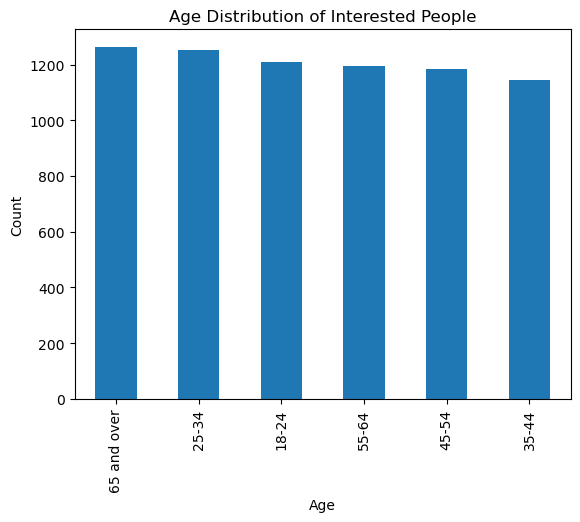

In [31]:
interested = data[data['requests_test_drive'] == True]

if interested.empty:
    print("No data found for people requesting test drives.")
else:
    interested['age'].value_counts().plot(kind='bar', title='Age Distribution of Interested People')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()


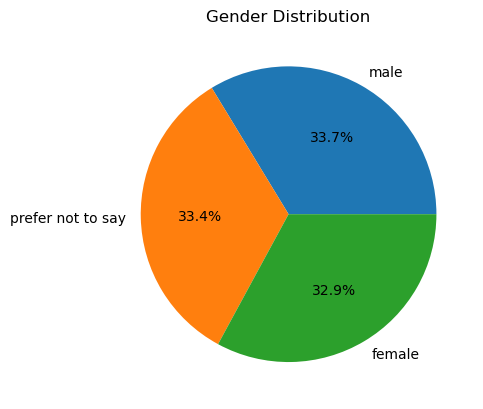

In [33]:
interested['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution')
plt.ylabel('')
plt.show()


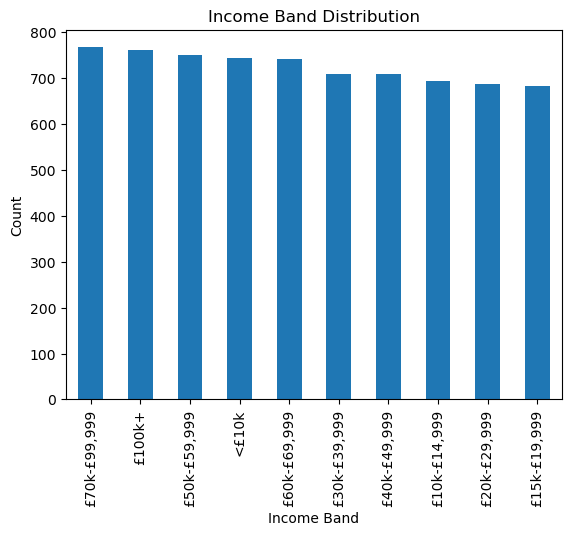

In [35]:
interested['income_band'].value_counts().plot(kind='bar', title='Income Band Distribution')
plt.xlabel('Income Band')
plt.ylabel('Count')
plt.show()


In [37]:
target_audience = interested.groupby(['gender', 'age', 'income_band']).size().reset_index(name='count')
print(target_audience.sort_values(by='count', ascending=False).head())


                gender          age   income_band  count
77                male        25-34  £50k-£59,999     57
139  prefer not to say        25-34  £70k-£99,999     54
57              female  65 and over  £50k-£59,999     53
18              female        25-34  £60k-£69,999     52
91                male        45-54        £100k+     52


In [39]:
data['requests_test_drive'] = data['requests_test_drive'].map({'Yes': True, 'No': False})


In [41]:
interested = data[data['requests_test_drive'] == True]


In [43]:
if interested.empty:
    print("No data found for people requesting test drives.")
else:
    print(interested.head())


No data found for people requesting test drives.


In [45]:
data = data.drop(columns=[col for col in data.columns if 'Unnamed' in col])


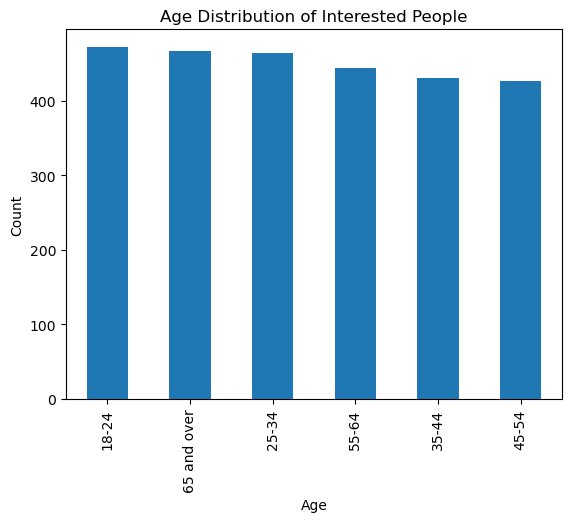

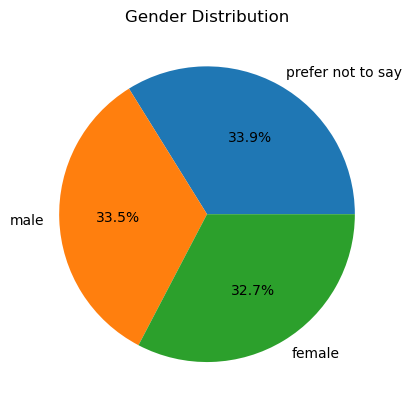

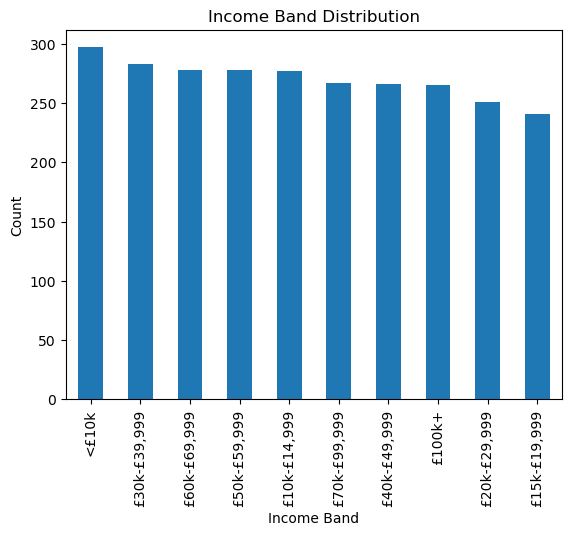

                gender          age   income_band  count
150  prefer not to say        45-54         <£10k     27
69                male        18-24  £70k-£99,999     26
175  prefer not to say  65 and over  £30k-£39,999     26
129  prefer not to say        18-24  £70k-£99,999     25
18              female        25-34  £60k-£69,999     24


In [47]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\natlo\OneDrive\Desktop\survey_data.csv.csv")

data = data.drop(columns=[col for col in data.columns if 'Unnamed' in col])

data['requests_test_drive'] = data['requests_test_drive'].map({'Yes': True, 'No': False})

interested = data[data['requests_test_drive'] == True]

if interested.empty:
    print("No data found for people requesting test drives.")
else:
    interested['age'].value_counts().plot(kind='bar', title='Age Distribution of Interested People')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

    interested['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution')
    plt.ylabel('')
    plt.show()

    interested['income_band'].value_counts().plot(kind='bar', title='Income Band Distribution')
    plt.xlabel('Income Band')
    plt.ylabel('Count')
    plt.show()

    target_audience = interested.groupby(['gender', 'age', 'income_band']).size().reset_index(name='count')
    print(target_audience.sort_values(by='count', ascending=False).head())


In [49]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\natlo\OneDrive\Desktop\survey_data.csv.csv"  # Use raw string to avoid escape character issues
df = pd.read_csv(file_path)

# Check the first few rows of the dataframe
print(df.head())

# Check the column names to make sure 'requests_test_drive' is there
print(df.columns)


  first_name last_name             gender    age       town   income_band  \
0   Jennifer    Burton             female  18-24    Bristol  £15k-£19,999   
1    Matthew    Corbyn               male  55-64     London  £50k-£59,999   
2       Paul    Harris  prefer not to say  25-34     London  £15k-£19,999   
3     Andrew    Taylor  prefer not to say  45-54  Liverpool        £100k+   
4     Joshua  O'Connor               male  35-44    Priston  £20k-£29,999   

  preferred_make owns_car has_drivers_license decision_maker  ...  \
0         Subaru       No                 Yes            Yes  ...   
1          Skoda      Yes                 Yes            Yes  ...   
2           Jeep      Yes                 Yes             No  ...   
3         Subaru      Yes                  No            Yes  ...   
4          Honda      Yes                 Yes             No  ...   

  requests_test_drive has_driveway Unnamed: 16 Unnamed: 17 Unnamed: 18  \
0                  No          Yes         NaN  

In [51]:
# Check for missing values in the 'requests_test_drive' column
missing_data = df['requests_test_drive'].isnull().sum()
print(f"Missing values in 'requests_test_drive': {missing_data}")

# Check rows with missing values in 'requests_test_drive'
empty_rows = df[df['requests_test_drive'].isnull()]
print("Rows with empty 'requests_test_drive' values:")
print(empty_rows)


Missing values in 'requests_test_drive': 0
Rows with empty 'requests_test_drive' values:
Empty DataFrame
Columns: [first_name, last_name, gender, age, town, income_band, preferred_make, owns_car, has_drivers_license, decision_maker, intent_on_buying, has_ongoing_lease, target_price_range, has_used_electric_vehicle, requests_test_drive, has_driveway, Unnamed: 16, Unnamed: 17, Unnamed: 18, Unnamed: 19, Unnamed: 20, Unnamed: 21, Unnamed: 22, Unnamed: 23]
Index: []

[0 rows x 24 columns]


In [53]:
# Example: Filter for rows where 'requests_test_drive' is 'yes'
specific_requests = df[df['requests_test_drive'] == 'yes']  # Adjust 'yes' to the value you're looking for
print(specific_requests)


Empty DataFrame
Columns: [first_name, last_name, gender, age, town, income_band, preferred_make, owns_car, has_drivers_license, decision_maker, intent_on_buying, has_ongoing_lease, target_price_range, has_used_electric_vehicle, requests_test_drive, has_driveway, Unnamed: 16, Unnamed: 17, Unnamed: 18, Unnamed: 19, Unnamed: 20, Unnamed: 21, Unnamed: 22, Unnamed: 23]
Index: []

[0 rows x 24 columns]


In [55]:
# Remove leading/trailing spaces from the column names
df.columns = df.columns.str.strip()

# Remove leading/trailing spaces from the 'requests_test_drive' values
df['requests_test_drive'] = df['requests_test_drive'].str.strip()

# Now filter again if needed
filtered_df = df[df['requests_test_drive'].notnull()]
print(filtered_df)


     first_name   last_name             gender    age          town  \
0      Jennifer      Burton             female  18-24       Bristol   
1       Matthew      Corbyn               male  55-64        London   
2          Paul      Harris  prefer not to say  25-34        London   
3        Andrew      Taylor  prefer not to say  45-54     Liverpool   
4        Joshua    O'Connor               male  35-44       Priston   
...         ...         ...                ...    ...           ...   
7245     Edward       Lewis               male  55-64       Morpeth   
7246  Alexander   Griffiths  prefer not to say  25-34  Loughborough   
7247     Sandra      Harris  prefer not to say  45-54      Longport   
7248      Reece       Allen               male  55-64       Morpeth   
7249        Ava  O'Sullivan  prefer not to say  45-54        Ramsay   

       income_band preferred_make owns_car has_drivers_license decision_maker  \
0     £15k-£19,999         Subaru       No                 Yes    

In [57]:
import pandas as pd

file_path = r"C:\Users\natlo\OneDrive\Desktop\survey_data.csv.csv"
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()
df['requests_test_drive'] = df['requests_test_drive'].str.strip().str.lower()

df_cleaned = df.loc[:, ~df.columns.str.contains('^Unnamed')]

unique_values = df_cleaned['requests_test_drive'].unique()
print("Unique values in 'requests_test_drive':")
print(unique_values)

test_drive_requests = df_cleaned[df_cleaned['requests_test_drive'] == 'yes']
print(f"Found {len(test_drive_requests)} test drive requests.")
print(test_drive_requests)

filtered_df = df_cleaned[df_cleaned['requests_test_drive'].isin(['yes', 'no'])]
print(f"Found {len(filtered_df)} rows with test drive requests.")
print(filtered_df)


Unique values in 'requests_test_drive':
['no' 'yes']
Found 2703 test drive requests.
     first_name   last_name             gender    age          town  \
2          Paul      Harris  prefer not to say  25-34        London   
5        Thomas       Swift               male  35-44       Morpeth   
7        Taylor     Knowles             female  45-54        Exeter   
9          Lily      Foster             female  45-54       Morpeth   
10       George       Smith               male  55-64       Burnley   
...         ...         ...                ...    ...           ...   
7243       Paul       Singh               male  25-34         Poole   
7244      Debra      Knight             female  25-34         Crewe   
7246  Alexander   Griffiths  prefer not to say  25-34  Loughborough   
7248      Reece       Allen               male  55-64       Morpeth   
7249        Ava  O'Sullivan  prefer not to say  45-54        Ramsay   

       income_band preferred_make owns_car has_drivers_license

In [59]:
# Assuming 'preferred_make' indicates interest in EVs (replace with actual column name if different)
ev_requests = df_cleaned[(df_cleaned['requests_test_drive'] == 'yes') & (df_cleaned['has_used_electric_vehicle'] == 'yes')]

# Print the number of people who requested an EV test drive
print(f"Number of people interested in EV test drive: {len(ev_requests)}")


Number of people interested in EV test drive: 0


In [61]:
# Check unique values for 'requests_test_drive'
print("Unique values in 'requests_test_drive':")
print(df['requests_test_drive'].unique())

# Check unique values for 'has_used_electric_vehicle'
print("Unique values in 'has_used_electric_vehicle':")
print(df['has_used_electric_vehicle'].unique())


Unique values in 'requests_test_drive':
['no' 'yes']
Unique values in 'has_used_electric_vehicle':
['Yes' 'No']


In [63]:
# Normalize the values by stripping spaces and converting to lowercase for both columns
df['requests_test_drive'] = df['requests_test_drive'].str.strip().str.lower()
df['has_used_electric_vehicle'] = df['has_used_electric_vehicle'].str.strip().str.lower()

# Check unique values again after normalization
print("Normalized unique values in 'requests_test_drive':")
print(df['requests_test_drive'].unique())

print("Normalized unique values in 'has_used_electric_vehicle':")
print(df['has_used_electric_vehicle'].unique())

# Filter for test drive requests where 'requests_test_drive' is 'yes' and 'has_used_electric_vehicle' is 'yes'
ev_requests = df[(df['requests_test_drive'] == 'yes') & (df['has_used_electric_vehicle'] == 'yes')]

# Print the result
print(f"Number of people interested in EV test drive: {len(ev_requests)}")


Normalized unique values in 'requests_test_drive':
['no' 'yes']
Normalized unique values in 'has_used_electric_vehicle':
['yes' 'no']
Number of people interested in EV test drive: 1002


           age  requests_test_drive
0        18-24                  180
1        25-34                  181
2        35-44                  145
3        45-54                  161
4        55-64                  165
5  65 and over                  170


C:\Users\natlo\AppData\Local\Temp\ipykernel_3764\2285743581.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=ev_requests, palette='viridis')


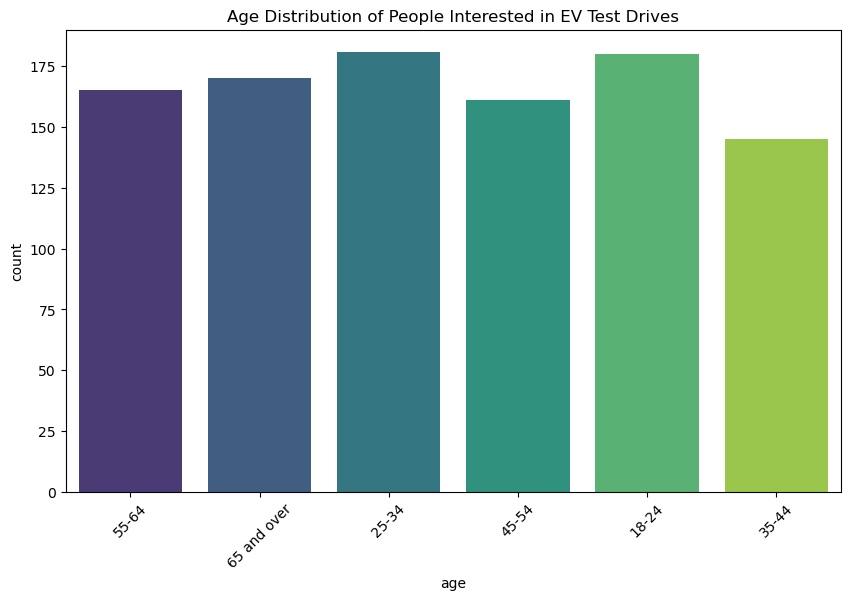

In [65]:
# Group by 'age' and count the number of test drive requests for EVs
age_group_analysis = ev_requests.groupby('age')['requests_test_drive'].count().reset_index()

# Display the result
print(age_group_analysis)

# Visualize the age distribution of people interested in EV test drives
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x='age', data=ev_requests, palette='viridis')
plt.title('Age Distribution of People Interested in EV Test Drives')
plt.xticks(rotation=45)
plt.show()


    income_band  requests_test_drive
0         <£10k                  102
1        £100k+                  104
2  £10k-£14,999                  110
3  £15k-£19,999                   88
4  £20k-£29,999                   91
5  £30k-£39,999                   87
6  £40k-£49,999                  104
7  £50k-£59,999                  108
8  £60k-£69,999                  104
9  £70k-£99,999                  104


C:\Users\natlo\AppData\Local\Temp\ipykernel_3764\4241395273.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income_band', data=ev_requests, palette='Blues')


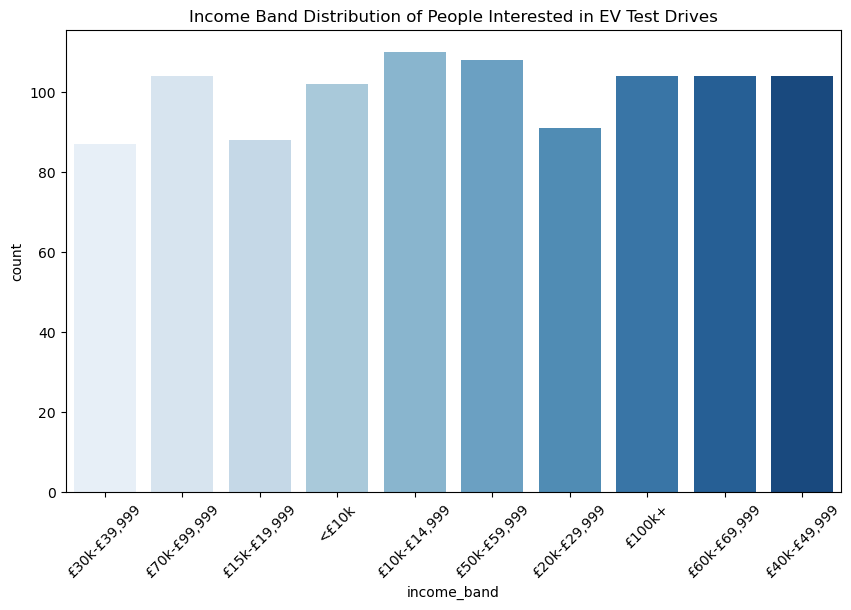

In [67]:
# Group by 'income_band' and count the number of test drive requests for EVs
income_group_analysis = ev_requests.groupby('income_band')['requests_test_drive'].count().reset_index()

# Display the result
print(income_group_analysis)

# Visualize the income distribution of people interested in EV test drives
plt.figure(figsize=(10,6))
sns.countplot(x='income_band', data=ev_requests, palette='Blues')
plt.title('Income Band Distribution of People Interested in EV Test Drives')
plt.xticks(rotation=45)
plt.show()


              gender  requests_test_drive
0             female                  328
1               male                  326
2  prefer not to say                  348


C:\Users\natlo\AppData\Local\Temp\ipykernel_3764\3793099887.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=ev_requests, palette='pastel')


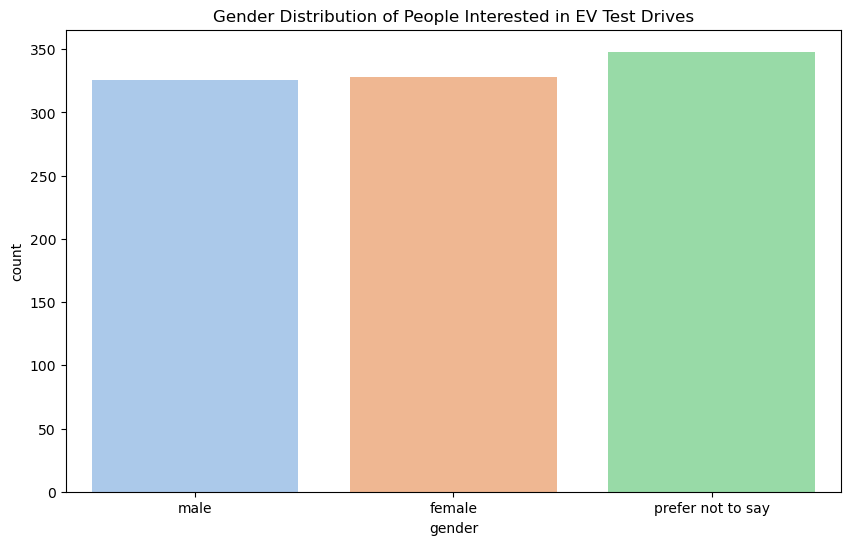

In [69]:
# Group by 'gender' and count the number of test drive requests for EVs
gender_group_analysis = ev_requests.groupby('gender')['requests_test_drive'].count().reset_index()

# Display the result
print(gender_group_analysis)

# Visualize the gender distribution of people interested in EV test drives
plt.figure(figsize=(10,6))
sns.countplot(x='gender', data=ev_requests, palette='pastel')
plt.title('Gender Distribution of People Interested in EV Test Drives')
plt.show()


  owns_car  requests_test_drive
0       No                  435
1      Yes                  567


C:\Users\natlo\AppData\Local\Temp\ipykernel_3764\4025201760.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='owns_car', data=ev_requests, palette='Set2')


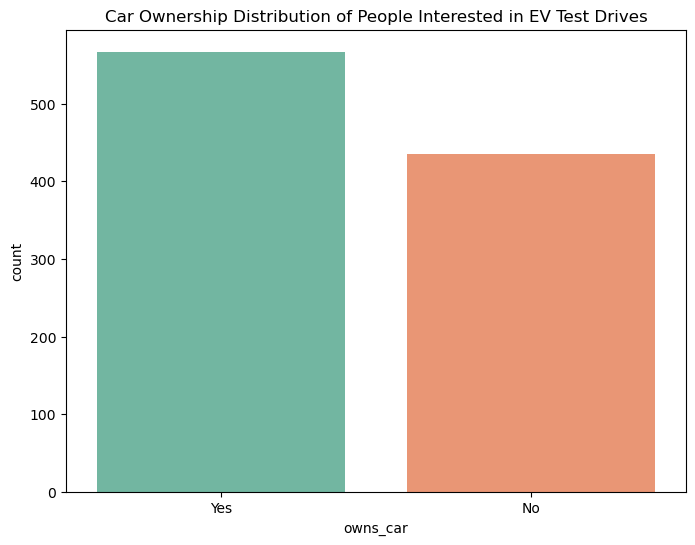

In [71]:
# Group by 'owns_car' and count the number of test drive requests for EVs
car_ownership_analysis = ev_requests.groupby('owns_car')['requests_test_drive'].count().reset_index()

# Display the result
print(car_ownership_analysis)

# Visualize car ownership of people interested in EV test drives
plt.figure(figsize=(8,6))
sns.countplot(x='owns_car', data=ev_requests, palette='Set2')
plt.title('Car Ownership Distribution of People Interested in EV Test Drives')
plt.show()


  has_drivers_license  requests_test_drive
0                  No                  377
1                 Yes                  625


C:\Users\natlo\AppData\Local\Temp\ipykernel_3764\3955730613.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='has_drivers_license', data=ev_requests, palette='coolwarm')


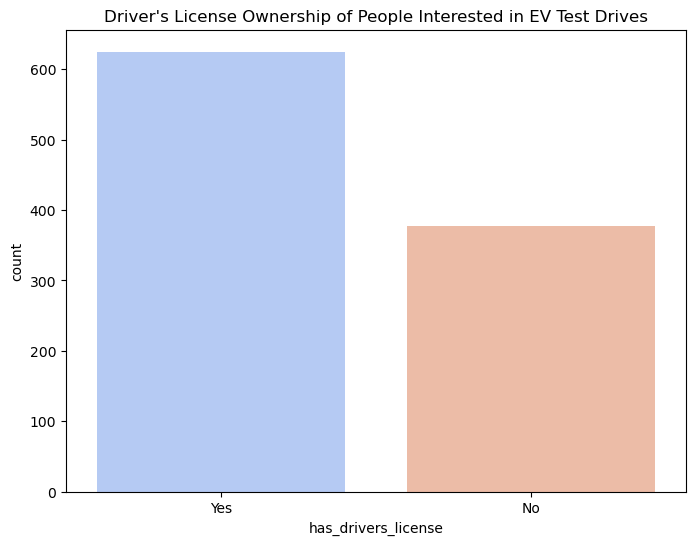

In [73]:
# Group by 'has_drivers_license' and count the number of test drive requests for EVs
license_group_analysis = ev_requests.groupby('has_drivers_license')['requests_test_drive'].count().reset_index()

# Display the result
print(license_group_analysis)

# Visualize the distribution of driver's license ownership among people interested in EV test drives
plt.figure(figsize=(8,6))
sns.countplot(x='has_drivers_license', data=ev_requests, palette='coolwarm')
plt.title("Driver's License Ownership of People Interested in EV Test Drives")
plt.show()


  intent_on_buying  requests_test_drive
0               No                  357
1              Yes                  645


C:\Users\natlo\AppData\Local\Temp\ipykernel_3764\2783323081.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='intent_on_buying', data=ev_requests, palette='plasma')


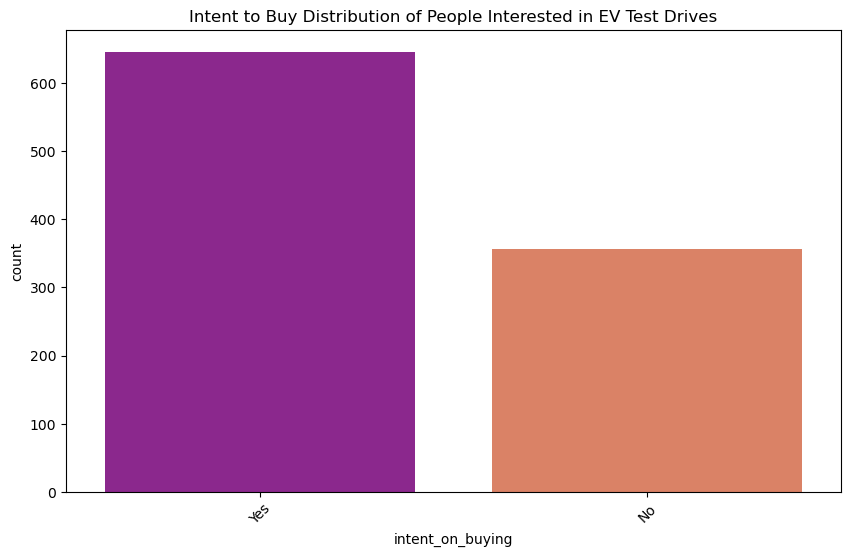

In [75]:
# Group by 'intent_on_buying' and count the number of test drive requests for EVs
buying_intent_analysis = ev_requests.groupby('intent_on_buying')['requests_test_drive'].count().reset_index()

# Display the result
print(buying_intent_analysis)

# Visualize the intent to buy distribution among people interested in EV test drives
plt.figure(figsize=(10,6))
sns.countplot(x='intent_on_buying', data=ev_requests, palette='plasma')
plt.title("Intent to Buy Distribution of People Interested in EV Test Drives")
plt.xticks(rotation=45)
plt.show()


  target_price_range  requests_test_drive
0      £10000-£20000                   92
1        £100K-£120K                  108
2        £120K-£150K                   78
3             £150K+                   94
4      £20000-£30000                  100
5      £30000-£40000                  102
6      £50000-£60000                   88
7      £70000-£80000                  109
8      £80000-£90000                  106
9       £90000-£100K                  125


C:\Users\natlo\AppData\Local\Temp\ipykernel_3764\1352376139.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target_price_range', data=ev_requests, palette='muted')


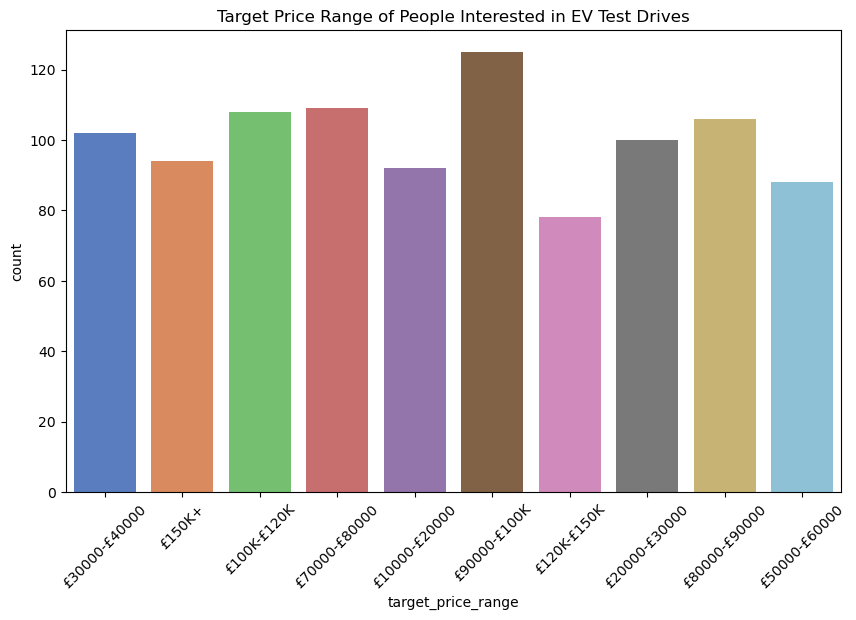

In [77]:
# Group by 'target_price_range' and count the number of test drive requests for EVs
price_range_analysis = ev_requests.groupby('target_price_range')['requests_test_drive'].count().reset_index()

# Display the result
print(price_range_analysis)

# Visualize the target price range distribution among people interested in EV test drives
plt.figure(figsize=(10,6))
sns.countplot(x='target_price_range', data=ev_requests, palette='muted')
plt.title("Target Price Range of People Interested in EV Test Drives")
plt.xticks(rotation=45)
plt.show()


  decision_maker  requests_test_drive
0             No                  447
1            Yes                  555


C:\Users\natlo\AppData\Local\Temp\ipykernel_3764\4037267809.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='decision_maker', data=ev_requests, palette='Set1')


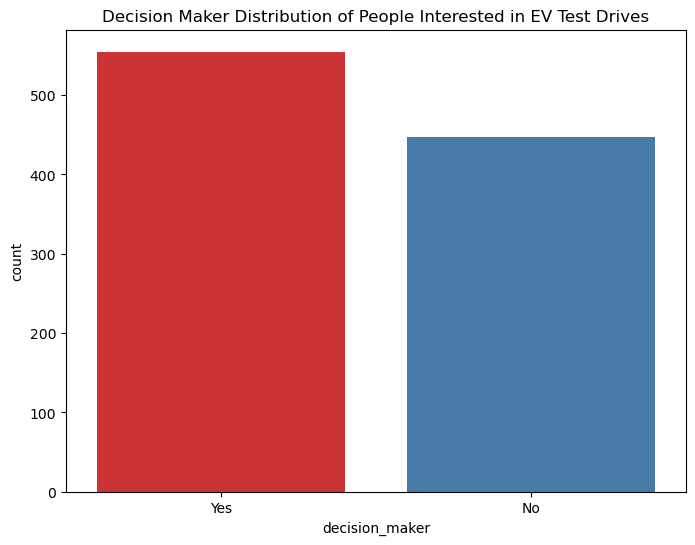

In [79]:
# Group by 'decision_maker' and count the number of test drive requests for EVs
decision_maker_analysis = ev_requests.groupby('decision_maker')['requests_test_drive'].count().reset_index()

# Display the result
print(decision_maker_analysis)

# Visualize the decision-maker distribution among people interested in EV test drives
plt.figure(figsize=(8,6))
sns.countplot(x='decision_maker', data=ev_requests, palette='Set1')
plt.title("Decision Maker Distribution of People Interested in EV Test Drives")
plt.show()


            town  requests_test_drive
0       Aberdeen                   32
1       Amersham                   31
2        Banbury                   20
3        Bedford                   26
4     Birmingham                   43
5      Blackpool                   26
6         Bodmin                   28
7        Bristol                   16
8        Burnley                   37
9    Cockermouth                   32
10     Congleton                   28
11         Crewe                   23
12         Derby                   28
13    Dorchester                   24
14        Dublin                   30
15        Durham                   32
16           Ely                   29
17        Exeter                   30
18      Hereford                   26
19     Leicester                   34
20     Liverpool                   25
21        London                   26
22      Longport                   21
23  Loughborough                   30
24        Lutton                   29
25    Manche

C:\Users\natlo\AppData\Local\Temp\ipykernel_3764\3356676672.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='town', data=ev_requests, palette='Spectral')


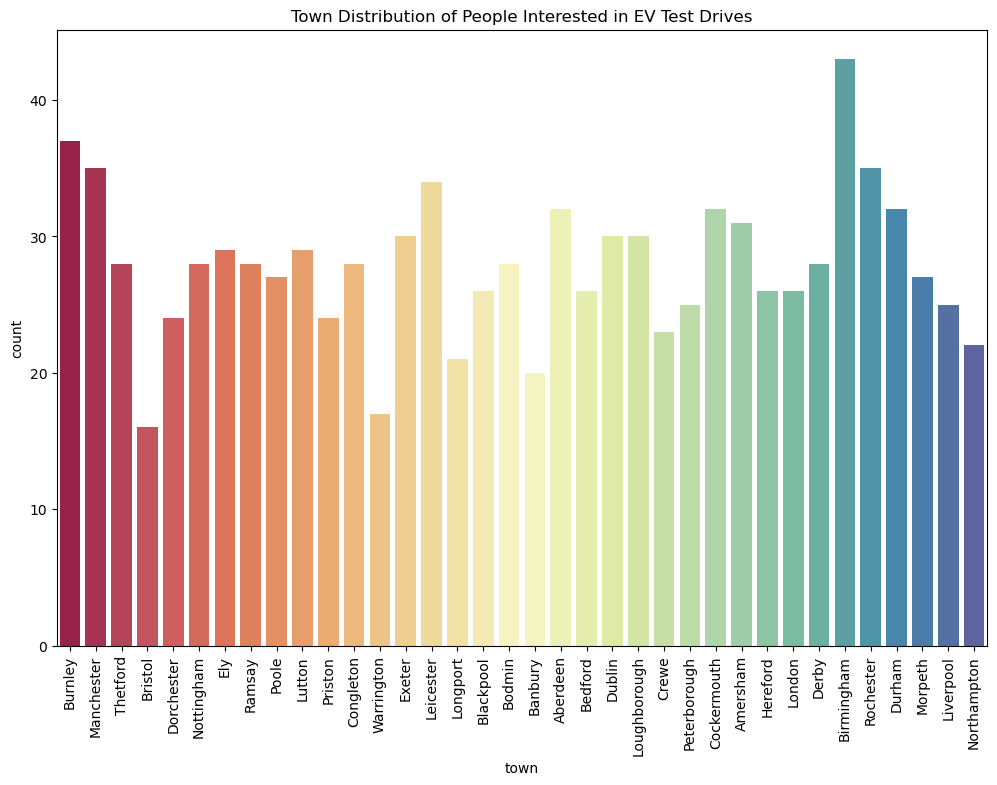

In [81]:
# Group by 'town' and count the number of test drive requests for EVs
town_analysis = ev_requests.groupby('town')['requests_test_drive'].count().reset_index()

# Display the result
print(town_analysis)

# Visualize the town distribution of people interested in EV test drives
plt.figure(figsize=(12,8))
sns.countplot(x='town', data=ev_requests, palette='Spectral')
plt.title("Town Distribution of People Interested in EV Test Drives")
plt.xticks(rotation=90)
plt.show()
